<a href="https://colab.research.google.com/github/AlysterBenedict/GEN_AI/blob/main/GEN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Program 1:
#Explore pre-trained word vectors. Explore word relationships using vector arithmetic. Perform arithmetic operations and analyze results.

In [ ]:
!pip install scipy==1.11.4 gensim==4.3.2 numpy --upgrade --force-reinstall


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36.4/36.4 MB 45.9 MB/s eta 0:00:00
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 19.4 MB/s eta 0:00:00
  

In [ ]:
# Import required libraries
import gensim.downloader as api
import numpy as np

# Load pre-trained word vectors
print("Loading pre-trained Word2Vec model... (This may take a minute)")
word_vectors = api.load("word2vec-google-news-300")

def explore_word_relationships(word1: str, word2: str, word3: str) -> None:
    """
    Performs vector arithmetic: word1 - word2 + word3 and prints the most similar words
    (excluding the input words).
    """
    for word in (word1, word2, word3):
        if word not in word_vectors.key_to_index:
            print(f"Error: '{word}' not found in the vocabulary.")
            return

    result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]
    similar_words = word_vectors.similar_by_vector(result_vector, topn=10)
    filtered_words = [(word, sim) for word, sim in similar_words if word not in {word1, word2, word3}]

    print(f"\nWord Relationship: {word1} - {word2} + {word3}")
    print("Most similar words to the result (excluding input words):")
    for word, sim in filtered_words[:5]:
        print(f"{word}: {sim:.4f}")

def analyze_similarity(word1: str, word2: str) -> None:
    """
    Calculates and prints the cosine similarity between two words.
    """
    for word in (word1, word2):
        if word not in word_vectors.key_to_index:
            print(f"Error: '{word}' not found in the vocabulary.")
            return

    similarity = word_vectors.similarity(word1, word2)
    print(f"\nSimilarity between '{word1}' and '{word2}': {similarity:.4f}")

def find_most_similar(word: str) -> None:
    """
    Prints the top 5 words most similar to the provided word.
    """
    if word not in word_vectors.key_to_index:
        print(f"Error: '{word}' not found in the vocabulary.")
        return

    similar_words = word_vectors.most_similar(word, topn=5)
    print(f"\nMost similar words to '{word}':")
    for similar_word, sim in similar_words:
        print(f"{similar_word}: {sim:.4f}")

# Sample executions
explore_word_relationships("king", "man", "woman")
explore_word_relationships("paris", "france", "germany")
explore_word_relationships("apple", "fruit", "carrot")

analyze_similarity("cat", "dog")
analyze_similarity("computer", "keyboard")
analyze_similarity("music", "art")

find_most_similar("happy")
find_most_similar("sad")
find_most_similar("technology")


Loading pre-trained Word2Vec model... (This may take a minute)
[==================================================] 100.0% 1662.8/1662.8MB downloaded

Word Relationship: king - man + woman
Most similar words to the result (excluding input words):
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819
prince: 0.5777

Word Relationship: paris - france + germany
Most similar words to the result (excluding input words):
berlin: 0.4838
german: 0.4695
lindsay_lohan: 0.4536
switzerland: 0.4468
heidi: 0.4445

Word Relationship: apple - fruit + carrot
Most similar words to the result (excluding input words):
carrots: 0.5700
proverbial_carrot: 0.4578
Carrot: 0.4159
Twizzler: 0.4074
peppermint_candy: 0.4074

Similarity between 'cat' and 'dog': 0.7609

Similarity between 'computer' and 'keyboard': 0.3964

Similarity between 'music' and 'art': 0.4010

Most similar words to 'happy':
glad: 0.7409
pleased: 0.6632
ecstatic: 0.6627
overjoyed: 0.6599
thrilled: 0.6514

Most similar words to '

#Program 2:
#Use dimensionality reduction (e.g., PCA or t-SNE) to visualize word embeddings for Q 1. Select 10 words from a specific domain (e.g., sports, technology) and visualize their embeddings. Analyze clusters and relationships. Generate contextually rich outputs using embeddings. Write a program to generate 5 semantically similar words for a given input.

Loading pre-trained word vectors...

Word Relationship: king - man + woman
Most similar words to the result (excluding input words):
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819
prince: 0.5777


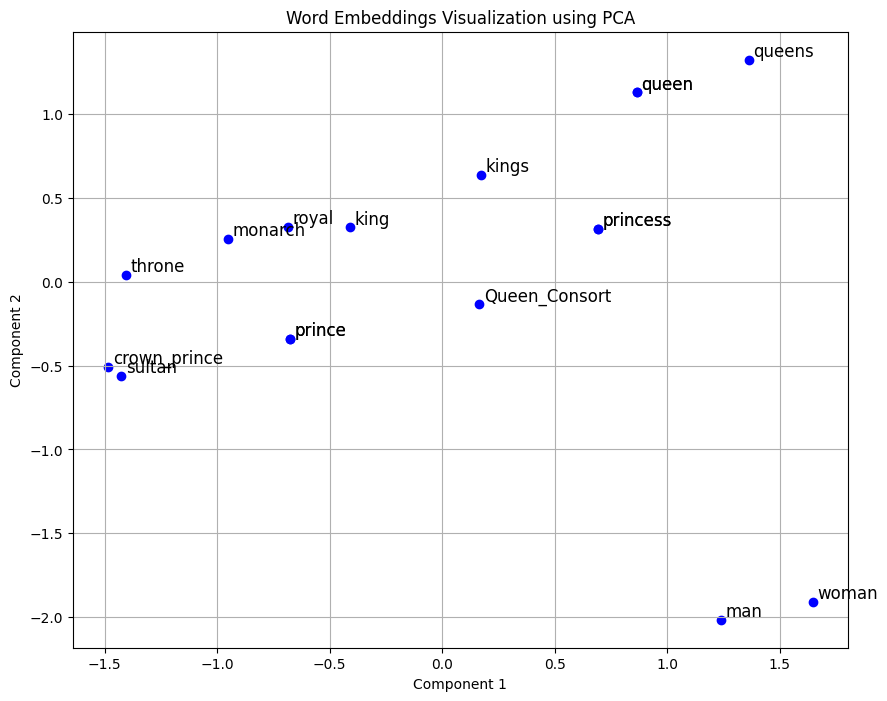

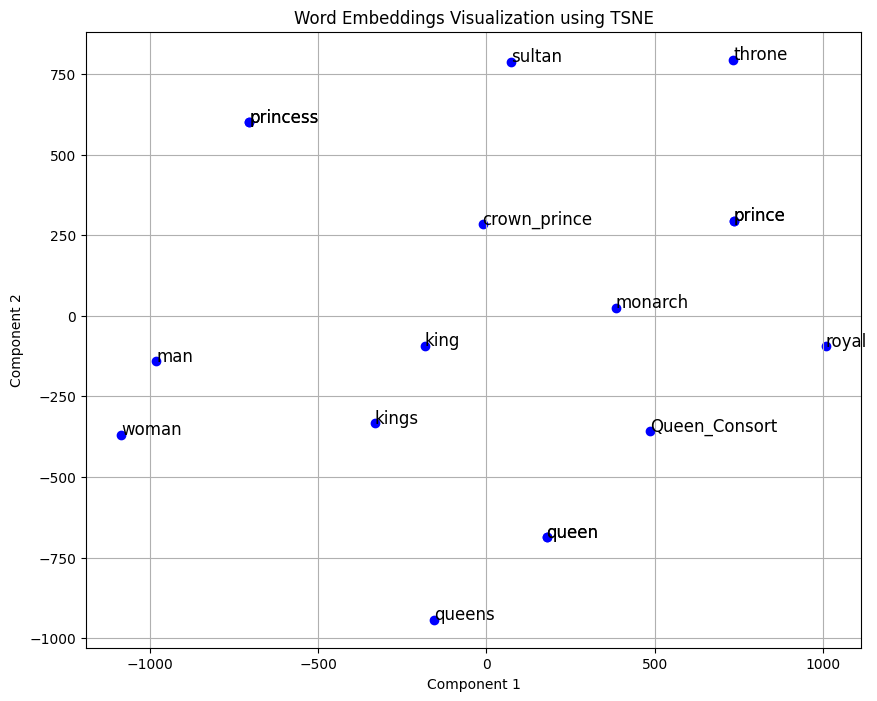

In [2]:
# Import libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load Word2Vec model
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")

# Function to perform vector arithmetic and find similar words
def explore_word_relationships(word1, word2, word3):
    try:
        result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]
        similar_words = word_vectors.similar_by_vector(result_vector, topn=10)
        input_words = {word1, word2, word3}
        filtered_words = [(word, similarity) for word, similarity in similar_words if word not in input_words]

        print(f"\nWord Relationship: {word1} - {word2} + {word3}")
        print("Most similar words to the result (excluding input words):")
        for word, similarity in filtered_words[:5]:
            print(f"{word}: {similarity:.4f}")
        return filtered_words
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")
        return []

# Function to visualize word embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method='pca'):
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=5)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    reduced_vectors = reducer.fit_transform(vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

# Example words
words_to_explore = ["king", "man", "woman", "queen", "prince", "princess", "royal", "throne"]
filtered_words = explore_word_relationships("king", "man", "woman")

# Combine all words to visualize
words_to_visualize = words_to_explore + [word for word, _ in filtered_words]

# Get the corresponding vectors
vectors_to_visualize = np.array([word_vectors[word] for word in words_to_visualize])

# Visualize using PCA
visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='pca')

# Visualize using t-SNE
visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='tsne')


(b) Select 10 words from a specific domain (e.g., sports, technology) and visualize their embeddings. Analyze clusters and relationships. Generate contextually rich outputs using embeddings. Write a program to generate 5 semantically similar words for a given input.

Loading pre-trained word vectors...


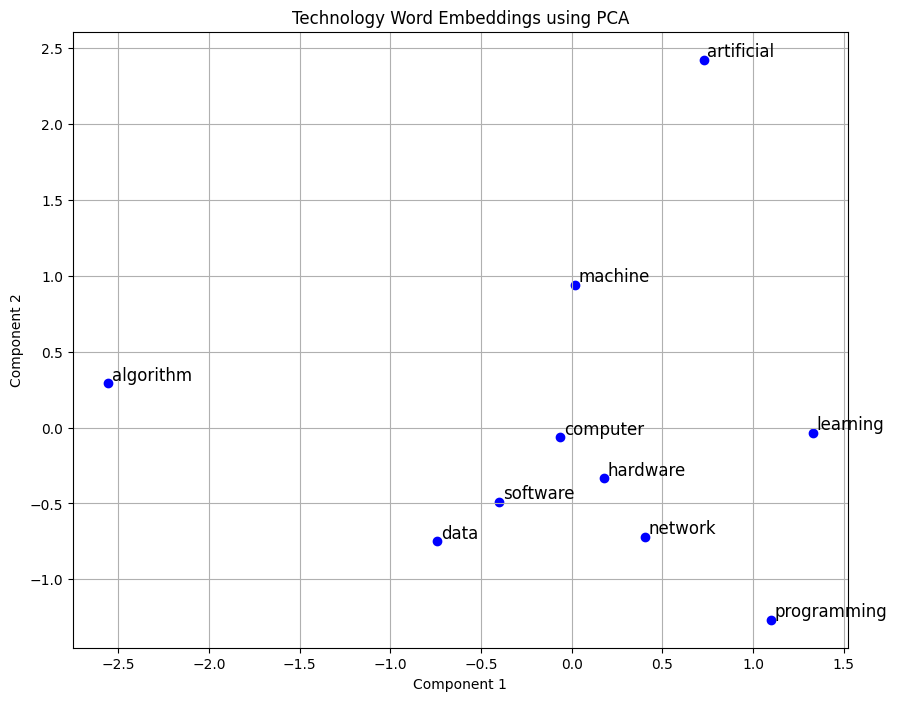

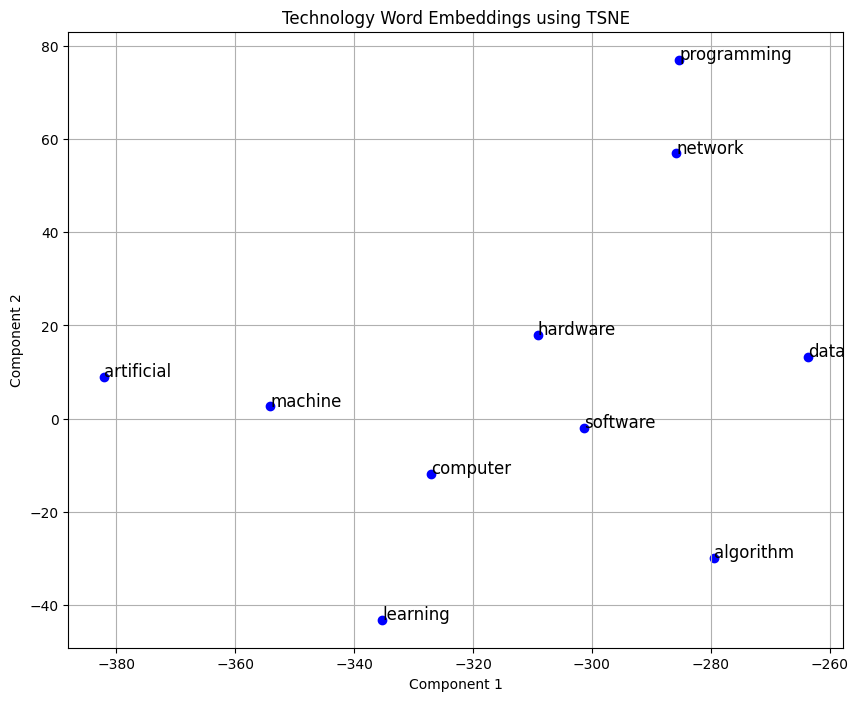


Top 5 semantically similar words to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082

Top 5 semantically similar words to 'learning':
teaching: 0.6602
learn: 0.6365
Learning: 0.6208
reteaching: 0.5810
learner_centered: 0.5739

Top 5 semantically similar words to 'software':
sofware: 0.7120
Software: 0.7104
copyrightable_Taney: 0.6358
softwares: 0.6314
CodeArmor: 0.6290


In [3]:
# Import necessary libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load pre-trained Word2Vec vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")

# Select 10 words from the 'technology' domain
domain_words = ["computer", "software", "hardware", "algorithm", "data",
                "network", "programming", "machine", "learning", "artificial"]

# Get their corresponding vectors
domain_vectors = np.array([word_vectors[word] for word in domain_words])

# Function to visualize embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method='pca', perplexity=5):
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    reduced_vectors = reducer.fit_transform(vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
    plt.title(f"Technology Word Embeddings using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

# Visualize using PCA
visualize_word_embeddings(domain_words, domain_vectors, method='pca')

# Visualize using t-SNE
visualize_word_embeddings(domain_words, domain_vectors, method='tsne', perplexity=3)

# Function to generate 5 semantically similar words for a given input
def generate_similar_words(word):
    try:
        similar_words = word_vectors.most_similar(word, topn=5)
        print(f"\nTop 5 semantically similar words to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity:.4f}")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")

# Examples: Generate similar words
generate_similar_words("computer")
generate_similar_words("learning")
generate_similar_words("software")


Program 3:
Train a custom Word2Vec model on a small dataset. Train embeddings on a domain-specific corpus (e.g., legal, medical) and analyze how embeddings capture domain-specific semantics.

Training Word2Vec model...
Model training complete!


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


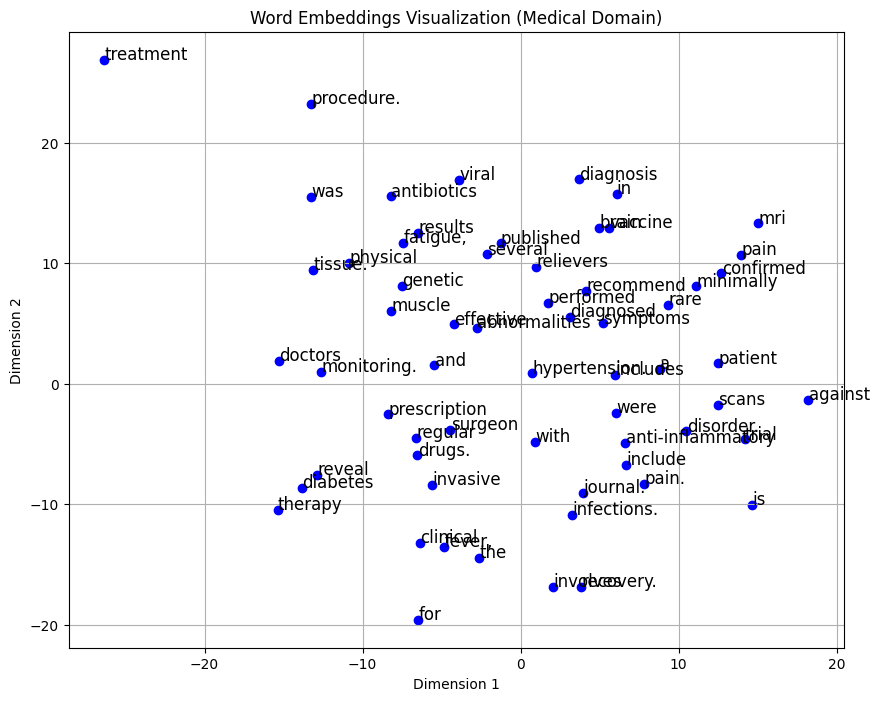


Words similar to 'treatment':
  procedure. (0.27)
  confirmed (0.15)
  muscle (0.13)
  monitoring. (0.12)
  fatigue, (0.12)

Words similar to 'vaccine':
  brain (0.26)
  recommend (0.21)
  procedure. (0.19)
  therapy (0.19)
  in (0.18)


In [4]:
# Import libraries
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Sample domain-specific corpus (medical domain)
medical_corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue, and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "The clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "The prescription includes pain relievers and anti-inflammatory drugs.",
    "The diagnosis confirmed a rare genetic disorder."
]

# Preprocess corpus (simple tokenization)
processed_corpus = [sentence.lower().split() for sentence in medical_corpus]

# Train Word2Vec model
print("Training Word2Vec model...")
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=50)
print("Model training complete!")

# Extract word vectors
words = list(model.wv.index_to_key)
embeddings = np.array([model.wv[word] for word in words])

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# Visualize embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color="blue")

for i, word in enumerate(words):
    plt.text(tsne_result[i, 0] + 0.02, tsne_result[i, 1] + 0.02, word, fontsize=12)

plt.title("Word Embeddings Visualization (Medical Domain)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

# Function to find similar words
def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"\nWords similar to '{input_word}':")
        for word, similarity in similar_words:
            print(f"  {word} ({similarity:.2f})")
    except KeyError:
        print(f"'{input_word}' not found in vocabulary.")

# Example queries
find_similar_words("treatment")
find_similar_words("vaccine")


Program 4:
Use word embeddings to improve prompts for Generative AI model. Retrieve similar words using word embeddings. Use the similar words to enrich a GenAI prompt. Use the AI model to generate responses for the original and enriched prompts. Compare the outputs in terms of detail and relevance.

In [9]:
!pip install transformers nltk
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
# Install required libraries
!pip install gensim transformers nltk matplotlib

# Import libraries
import gensim.downloader as api
from transformers import pipeline
import nltk
import string
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('punkt')  # Correct resource for tokenization
nltk.download('punkt_tab')

# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("glove-wiki-gigaword-100")  # You can change to another model if desired

# Function to replace a keyword in the prompt with its most similar word
def replace_keyword_in_prompt(prompt, keyword, word_vectors, topn=1):
    words = word_tokenize(prompt)
    enriched_words = []
    for word in words:
        cleaned_word = word.lower().strip(string.punctuation)
        if cleaned_word == keyword.lower():
            try:
                similar_words = word_vectors.most_similar(cleaned_word, topn=topn)
                if similar_words:
                    replacement_word = similar_words[0][0]
                    print(f"Replacing '{word}' ‚Üí '{replacement_word}'")
                    enriched_words.append(replacement_word)
                    continue  # Skip appending original
            except KeyError:
                print(f"'{keyword}' not found in the vocabulary. Using original word.")
        enriched_words.append(word)
    enriched_prompt = " ".join(enriched_words)
    print(f"\nüîπ Enriched Prompt: {enriched_prompt}")
    return enriched_prompt

# Load GPT-2 model for text generation
print("\nLoading GPT-2 model...")
generator = pipeline("text-generation", model="gpt2")

# Function to generate response using GPT-2
def generate_response(prompt, max_length=100):
    try:
        response = generator(prompt, max_length=max_length, num_return_sequences=1)
        return response[0]['generated_text']
    except Exception as e:
        print(f"Error generating response: {e}")
        return None

# Example original prompt
original_prompt = "Who is king."
print(f"\nüîπ Original Prompt: {original_prompt}")

# Define the keyword to be enriched
key_term = "king"

# Enrich the prompt
enriched_prompt = replace_keyword_in_prompt(original_prompt, key_term, word_vectors)

# Generate responses
print("\nGenerating response for the original prompt...")
original_response = generate_response(original_prompt)
print("\nOriginal Prompt Response:")
print(original_response)

print("\nGenerating response for the enriched prompt...")
enriched_response = generate_response(enriched_prompt)
print("\nEnriched Prompt Response:")
print(enriched_response)

# Comparison
print("\nüìä Comparison of Responses:")
print("Original Prompt Response Length:", len(original_response))
print("Enriched Prompt Response Length:", len(enriched_response))
print("Original Prompt Sentences:", original_response.count('.'))
print("Enriched Prompt Sentences:", enriched_response.count('.'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Loading pre-trained word vectors...

Loading GPT-2 model...


Device set to use cpu



üîπ Original Prompt: Who is king.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Replacing 'king' ‚Üí 'prince'

üîπ Enriched Prompt: Who is prince .

Generating response for the original prompt...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Original Prompt Response:
Who is king. But this is no sin of God; it is a law that ought to be followed, and no man can commit such an act without taking responsibility. He never has done evil in the body, for God hath commanded it. He did good in the heart before, and in the mind, but that he have done good has no relation to the act itself. What is the reason for this? If we believe that God acts in the body, there is nothing which could lead a

Generating response for the enriched prompt...

Enriched Prompt Response:
Who is prince .... and is a man?" It is a question that brings out a curious paradox. At the very first period in which the prince is mentioned, his status and place of origin are not yet fully ascertained: he is a man living outside the sphere of official state power, as is obvious from his position as emperor by the emperor's decree, and is on the part of the other royal family, his family who are members in the family of the emperor, and whose

üìä Comparison of Re

Program 5:
Use word embeddings to create meaningful sentences for creative tasks. Retrieve similar words for a seed word. Create a sentence or story using these words as a starting point. Write a program that: Takes a seed word. Generates similar words. Constructs a short paragraph using these words.

In [11]:
import gensim.downloader as api
import random
import nltk
from nltk.tokenize import sent_tokenize

# Ensure required resources are downloaded
nltk.download('punkt')

# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("glove-wiki-gigaword-100")  # 100D GloVe word embeddings
print("Word vectors loaded successfully!")

# Function to retrieve top-N similar words for a given seed word
def get_similar_words(seed_word, top_n=5):
    """Retrieve top-N similar words for a given seed word."""
    try:
        similar_words = word_vectors.most_similar(seed_word, topn=top_n)
        return [word[0] for word in similar_words]
    except KeyError:
        print(f"'{seed_word}' not found in vocabulary. Try another word.")
        return []

# Function to create a meaningful sentence using the seed word and its similar words
def generate_sentence(seed_word, similar_words):
    """Create a meaningful sentence using the seed word and its similar words."""
    sentence_templates = [
        f"The {seed_word} was surrounded by {similar_words[0]} and {similar_words[1]}.",
        f"People often associate {seed_word} with {similar_words[2]} and {similar_words[3]}.",
        f"In the land of {seed_word}, {similar_words[4]} was a common sight.",
        f"A story about {seed_word} would be incomplete without {similar_words[1]} and {similar_words[3]}.",
    ]
    return random.choice(sentence_templates)

# Function to construct a creative paragraph using the seed word and similar words
def generate_paragraph(seed_word):
    """Construct a creative paragraph using the seed word and similar words."""
    similar_words = get_similar_words(seed_word, top_n=5)
    if not similar_words:
        return "Could not generate a paragraph. Try another seed word."
    paragraph = [generate_sentence(seed_word, similar_words) for _ in range(4)]
    return " ".join(paragraph)

# Example usage
seed_word = input("Enter a seed word: ")
paragraph = generate_paragraph(seed_word)

# Print the generated paragraph
print("\nGenerated Paragraph:\n")
print(paragraph)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading pre-trained word vectors...
Word vectors loaded successfully!
Enter a seed word: cat

Generated Paragraph:

People often associate cat with cats and monkey. In the land of cat, pet was a common sight. A story about cat would be incomplete without rabbit and monkey. In the land of cat, pet was a common sight.


Program 6:
Use a pre-trained Hugging Face model to analyze sentiment in text. Assume a real-world application, Load the sentiment analysis pipeline. Analyze the sentiment by giving sentences to input.

In [12]:
# Install required libraries (only needed for first-time setup)
#!pip install transformers

# Import the sentiment analysis pipeline from Hugging Face
from transformers import pipeline

# Load the sentiment analysis pipeline
print("üîç Loading Sentiment Analysis Model...")
sentiment_analyzer = pipeline("sentiment-analysis")

# Function to analyze sentiment
def analyze_sentiment(text):
    """
    Analyze the sentiment of a given text input.
    Args:
        text (str): Input sentence or paragraph.
    Returns:
        dict: Sentiment label and confidence score.
    """
    result = sentiment_analyzer(text)[0]  # Get the first result
    label = result['label']  # Sentiment label (POSITIVE/NEGATIVE)
    score = result['score']  # Confidence score
    print(f"\nüìù Input Text: {text}")
    print(f"üìä Sentiment: {label} (Confidence: {score:.4f})\n")
    return result

# Example real-world application: Customer feedback analysis
customer_reviews = [
    "The product is amazing! I love it so much.",
    "I'm very disappointed. The service was terrible.",
    "It was an average experience, nothing special.",
    "Absolutely fantastic quality! Highly recommended.",
    "Not great, but not the worst either."
]

# Analyze sentiment for multiple reviews
print("\nüì¢ Customer Sentiment Analysis Results:")
for review in customer_reviews:
    analyze_sentiment(review)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


üîç Loading Sentiment Analysis Model...


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



üì¢ Customer Sentiment Analysis Results:

üìù Input Text: The product is amazing! I love it so much.
üìä Sentiment: POSITIVE (Confidence: 0.9999)


üìù Input Text: I'm very disappointed. The service was terrible.
üìä Sentiment: NEGATIVE (Confidence: 0.9998)


üìù Input Text: It was an average experience, nothing special.
üìä Sentiment: NEGATIVE (Confidence: 0.9995)


üìù Input Text: Absolutely fantastic quality! Highly recommended.
üìä Sentiment: POSITIVE (Confidence: 0.9999)


üìù Input Text: Not great, but not the worst either.
üìä Sentiment: NEGATIVE (Confidence: 0.9961)

